In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-on Activity 13.1: Linear regression with a single variable

## Objectives

+ To introduce linear regression with a single variable

## An example where things work as expected

Let's create a synthetic dataset to introduce the basic concepts.
It has to be synthetic because we want to know what the ground truth is.
Let's start with pairs of $x$ and $y$ which definitely have a linear relationship, albeit $y$ may be contaminated with Gaussian noise.
In particular, we generate the data from:
$$
y_i = -0.5 + 2 x_i + 0.1\epsilon_i,
$$
where $\epsilon_i \sim N(0,1)$ and where we sample $x_i \sim U([0,1])$.
Here is how to generate this synthetic dataset and how it looks like.

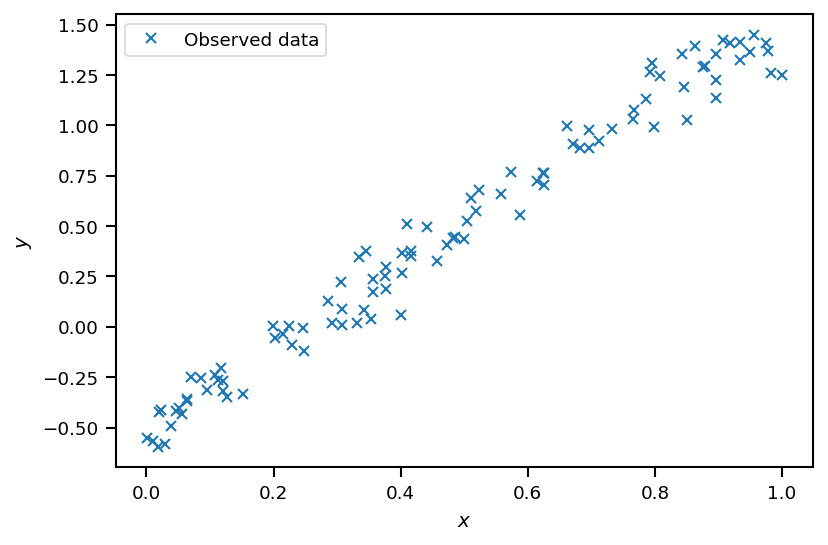

In [6]:
# How many observations we have
num_obs = 100
x = np.random.rand(num_obs)
w0_true = -0.5
w1_true = 2.0
sigma_true = 0.1
y = w0_true + w1_true * x + sigma_true * np.random.randn(num_obs)
# Let's plot the data
fig, ax = plt.subplots(dpi=150)
ax.plot(x, y, 'x', label='Observed data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

We will now use least squares to fit the data to this linear model:
$$
y = w_0 + w_1 x.
$$
As we discussed in the lecture, least squares minimize the square loss:
$$
L(\mathbf{w}) = \sum_{i=1}^N(y_i - w_0 - w_1 x_i)^2 = \parallel \mathbf{y} - \mathbf{X}\mathbf{w}\parallel_2^2,
$$
where $\mathbf{y} = (y_1,\dots,y_N)$ is the vector of observations, $\mathbf{w} = (w_0, w_1)$ is the weight vector, and the $N\times 2$ *design matrix* $\mathbf{X}$ is:
$$
\mathbf{X} = 
\begin{bmatrix} 
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N
\end{bmatrix}.
$$
To solve the least squares problems numerically, we need to for $\mathbf{X}$.
Here we go:

In [7]:
# Put together a column of ones next to the observed x's
X = np.hstack([np.ones((num_obs, 1)), x.reshape((num_obs, 1))])

Once we have this, we can use [numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html?highlight=lstsq#numpy.linalg.lstsq) to solve the least squares problem. It works as follows:

In [8]:
# It returns quite a few things that we haven't explained yet, which are going to ignore
w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
print('w_0 = {0:1.2f}'.format(w[0]))
print('w_1 = {0:1.2f}'.format(w[1]))

w_0 = -0.51
w_1 = 2.02


So, you see that the values we found for $w_0$ and $w_1$ are close to the correct values, but not exactly the same.
That is fine. There is noise in the data and we have only used ten observations.
The more noise there is, the more observations it would take to identify the regression coefficients correctly.

Let's now plot the regression function against the data:

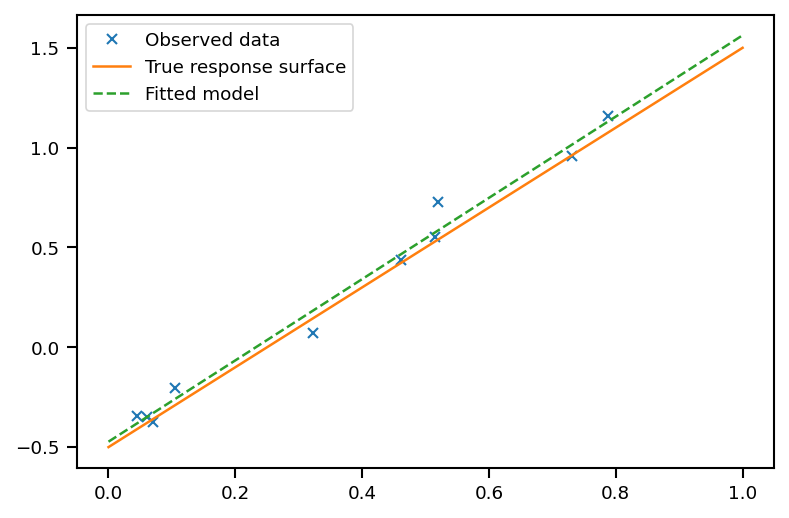

In [5]:
fig, ax = plt.subplots(dpi=150)
# Some points on which to evaluate the regression function
xx = np.linspace(0, 1, 100)
# The true connection between x and y
yy_true = w0_true + w1_true * xx
# The model we just fitted
yy = w[0] + w[1] * xx
# plot the data again
ax.plot(x, y, 'x', label='Observed data')
# overlay the true 
ax.plot(xx, yy_true, label='True response surface')
# overlay our prediction
ax.plot(xx, yy, '--', label='Fitted model')
plt.legend(loc='best');

## Questions

+ Try increasing ``num_obs`` to 100. Does the fit improve? Conclusion: When you training with least squares, the more data you have the better.
+ Try decreasing ``num_obs`` to 2. What is happening here? This is an example of fitting the noise.

## An example where things do not work as expected.

Let's try to fit a linear regression model to data generated from:
$$
y_i = -0.5 + 2x_i + 2x_i^2 + \epsilon_i,
$$
where $\epsilon_i \sim N(0, 1)$ and where we sample $x_i \sim U([-1,1])$:

In [ ]:
# How many observations we have
num_obs = 10
x = -1.0 + 2 * np.random.rand(num_obs)
w0_true = -0.5
w1_true = 2.0
w2_true = 2.0
sigma_true = 0.1
y = w0_true + w1_true * x + w2_true * x ** 2 + sigma_true * np.random.randn(num_obs)
# Let's plot the data
fig, ax = plt.subplots(dpi=150)
ax.plot(x, y, 'x', label='Observed data')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.legend(loc='best');

We will still try to fit a linear model to this dataset. We know that it is not going to work well, but let's try it anyway.
First, create the design matrix just like before:

In [ ]:
X = np.hstack([np.ones((num_obs, 1)), x.reshape((num_obs, 1))])
w, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
print('w_0 = {0:1.2f}'.format(w[0]))
print('w_1 = {0:1.2f}'.format(w[1]))

In [ ]:
fig, ax = plt.subplots(dpi=150)
# Some points on which to evaluate the regression function
xx = np.linspace(-1, 1, 100)
# The true connection between x and y
yy_true = w0_true + w1_true * xx + w2_true * xx ** 2
# The model we just fitted
yy = w[0] + w[1] * xx
# plot the data again
ax.plot(x, y, 'x', label='Observed data')
# overlay the true 
ax.plot(xx, yy_true, label='True response surface')
# overlay our prediction
ax.plot(xx, yy, '--', label='Fitted model')
plt.legend(loc='best');

## Questions

+ Experiment with very small ``num_obs``. If you did not know what the true response surface was, would you be able to say whether or not the fit is good?

+ Experiment with a big ``num_obs``. Does the fit improve? This is an example of *underfitting*. Your model does not have enough expressivity to capture the data.